**Today concepts**
* Dimensionality Reduction
    * Applying PCA
* manipulating categorical data with
    * LabelEncoder
    * OneHotEncoder
    * get_dummies
* Saving/Reading ML model for future use
* For Awareness we connecting ML model with Web application(Flask)

**Dimensionality Reduction**

Reduction of the dimension of the features space is called **Dimensionality Reduction**

**In this dimensionality Reduction**

1. Feature Elimination
2. Feature Extraction

**Feature Elimination**

means Removing less important columns/features and taking only remaining featurres is called the feature elimination

**Feature Extraction**

we create new independent features/variable,where each new variable is a combination of each of the old columns**

**simple example for feature extraction**

if we have **number of production** and **price of product** as features then we can tranform these features into single feature as **total_price**

**Advantage**

by combining the features you can not loose information


by reducing the features your model able to work well

**Principal Component Analysis**

it is the technique for feature extraction



each  of the new variable after PCA are all independent to each other

**Now we apply PCA for breast cancer data**

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

**Get the data**

In [63]:
from sklearn.datasets import load_breast_cancer

In [64]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [65]:
df = pd.DataFrame(cancer['data'])
df.columns = cancer['feature_names']
df['target'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [66]:
df.shape # 569 rows and 31 columns

(569, 31)

In [67]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

**To apply PCA before that we have to standardize the data**

Example  salary range 10000 to 90000
purchase price  1000  5000 to convert into same scale


**step-1** import standardscaler

In [68]:
from sklearn.preprocessing import StandardScaler

**step-2** create object

In [69]:
scaler = StandardScaler()

**step-3** transform the data

scaler.fit_transform(Features)

In [70]:
X = df.drop('target',axis=1)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [71]:
X_transformed = scaler.fit_transform(X)

**we apply PCA**

In [72]:
from sklearn.decomposition import PCA

**we have to tell number of principal components/new columns required**

In [73]:
pcaObj = PCA(n_components=2)

In [74]:
newFeatures = pcaObj.fit_transform(X_transformed)

In [75]:
pca_df = pd.DataFrame(newFeatures,columns=['PCA1','PCA2'])
pca_df.head()

,PCA1,PCA2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


**How much information carried from actual features(30 features) to new features(2 pca components)**

**explained_variance_ration**

In [76]:
pcaObj.explained_variance_ratio_*100

array([44.27202561, 18.97118204])

**Visualisation**

In [77]:
pca_df.head(2)

,PCA1,PCA2
0,9.192837,1.948583
1,2.387802,-3.768172


In [78]:
pca_df['target'] = df['target']
pca_df.head(2)

,PCA1,PCA2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0


**separate the cancer and non cancer data**

In [79]:
mask1 = pca_df['target'] == 1 
mask2 = pca_df['target'] == 0
hasCancer = pca_df[mask1]
hasNoCancer = pca_df[mask2]

In [80]:
hasCancer.head()

,PCA1,PCA2,target
19,-1.237063,-0.188215,1
20,-1.578161,0.572808,1
21,-3.557336,1.662950,1
37,-3.749313,-1.413473,1
46,-4.581937,1.484220,1


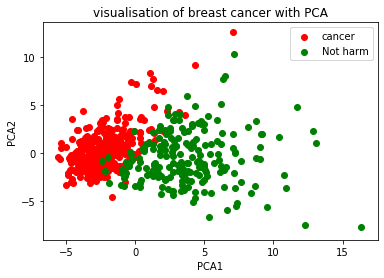

In [81]:
plt.figure()
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('visualisation of breast cancer with PCA')
plt.scatter(hasCancer['PCA1'] ,hasCancer['PCA2'],c='red',label='cancer')

plt.scatter(hasNoCancer['PCA1'] ,hasNoCancer['PCA2'],c='green',label='Not harm')
plt.legend()
plt.show()

**We can observe how much accuracy without PCA**

In [82]:
y = df['target']

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)
print('score',model.score(X,y)*100)

score 95.95782073813707


C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**we can observe how much accuracy with PCA**

In [84]:
pca_df.head()

,PCA1,PCA2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


In [85]:
X = pca_df.drop('target',axis=1)
y = pca_df['target']

In [86]:
model = LogisticRegression()
model.fit(X,y)
print('Score',model.score(X,y)* 100)

Score 95.43057996485061


C:\Users\bandi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**We are getting approximatly same accuracy even we use 2 new column for model**

**manipulating the categorical data**

In [87]:
df = pd.read_csv('fruit_data_with_colours.csv')
df.drop('fruit_label',axis=1,inplace=True)
df.head(2)

,fruit_name,fruit_subtype,mass,width,height,color_score
0,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,180,8.0,6.8,0.59


**unique items in fruit_name target**

In [88]:
df['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

**apple -> 0,mandrain-1,orange-2 lemon->3**

**LabelEncoder**

**step-1** import the label encoder

In [89]:
from sklearn.preprocessing import LabelEncoder

**step-2** create object

In [90]:
le = LabelEncoder()

**step-3** specifiy the unique items
by fit()

In [91]:
le.fit(['apple','mandarin','orange','lemon'])

LabelEncoder()

**step-4**  which value assigned for each data

In [92]:
le.classes_

array(['apple', 'lemon', 'mandarin', 'orange'], dtype='<U8')

**step-4** give actual values

In [93]:
le.transform(df['fruit_name'])

array([0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**or**

In [94]:
le = LabelEncoder()
le.fit_transform(df['fruit_name'])

array([0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## OneHotEncoder

In [95]:
from sklearn.preprocessing import OneHotEncoder

In [96]:
enc = OneHotEncoder()

In [97]:
enc.fit(df[['fruit_name']])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [98]:
enc.transform(df[['fruit_name']]).toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],


#### get_dummies()

In [99]:
pd.get_dummies(df['fruit_name'])

,apple,lemon,mandarin,orange
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,1,0,0,0


### save the model/read model

In [100]:
df = pd.read_csv('fruit_data_with_colours.csv')

In [101]:
df.head(2)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59


In [102]:
df.sample(5)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
33,3,orange,turkey_navel,190,7.5,8.1,0.74
27,3,orange,selected_seconds,204,7.5,9.2,0.77
5,2,mandarin,mandarin,80,5.8,4.3,0.77
30,3,orange,selected_seconds,158,7.1,7.5,0.79
10,1,apple,braeburn,166,6.9,7.3,0.93


In [55]:
X = df[['mass','width','height']]
y = df['fruit_label']

**we train the model with Knn**

In [57]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X,y)
print(model.score(X,y)*100)

81.35593220338984


**to save the model for future use**

In [58]:
import pickle

In [59]:
pickle.dump(model,  open('fruitModel.pkl','wb') )

**how to reuse /read model**

In [60]:
model = pickle.load(open('fruitModel.pkl','rb')) 

In [61]:
model.predict([[192,8.3,7.3]])

array([1], dtype=int64)

**1. Kaggle website**
**2. towardsdatascience**
**3. analyticsvidya**

**It will take 15 to 20 days to get the certificate**